# Visualisation of the evolution of the density in time

Created by Van Hoey S.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
dichtheid = pd.read_csv("bevolkingsdichtheidperwijk.csv", sep=";", index_col=0)
dichtheid.columns = [ year[-4:] for year in dichtheid.columns]

In [4]:
color={'Brugse Poort - Rooigem':'red',
       'Bloemekenswijk':'chocolate'}

/media/DATA/anaconda/envs/work/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'GillSans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


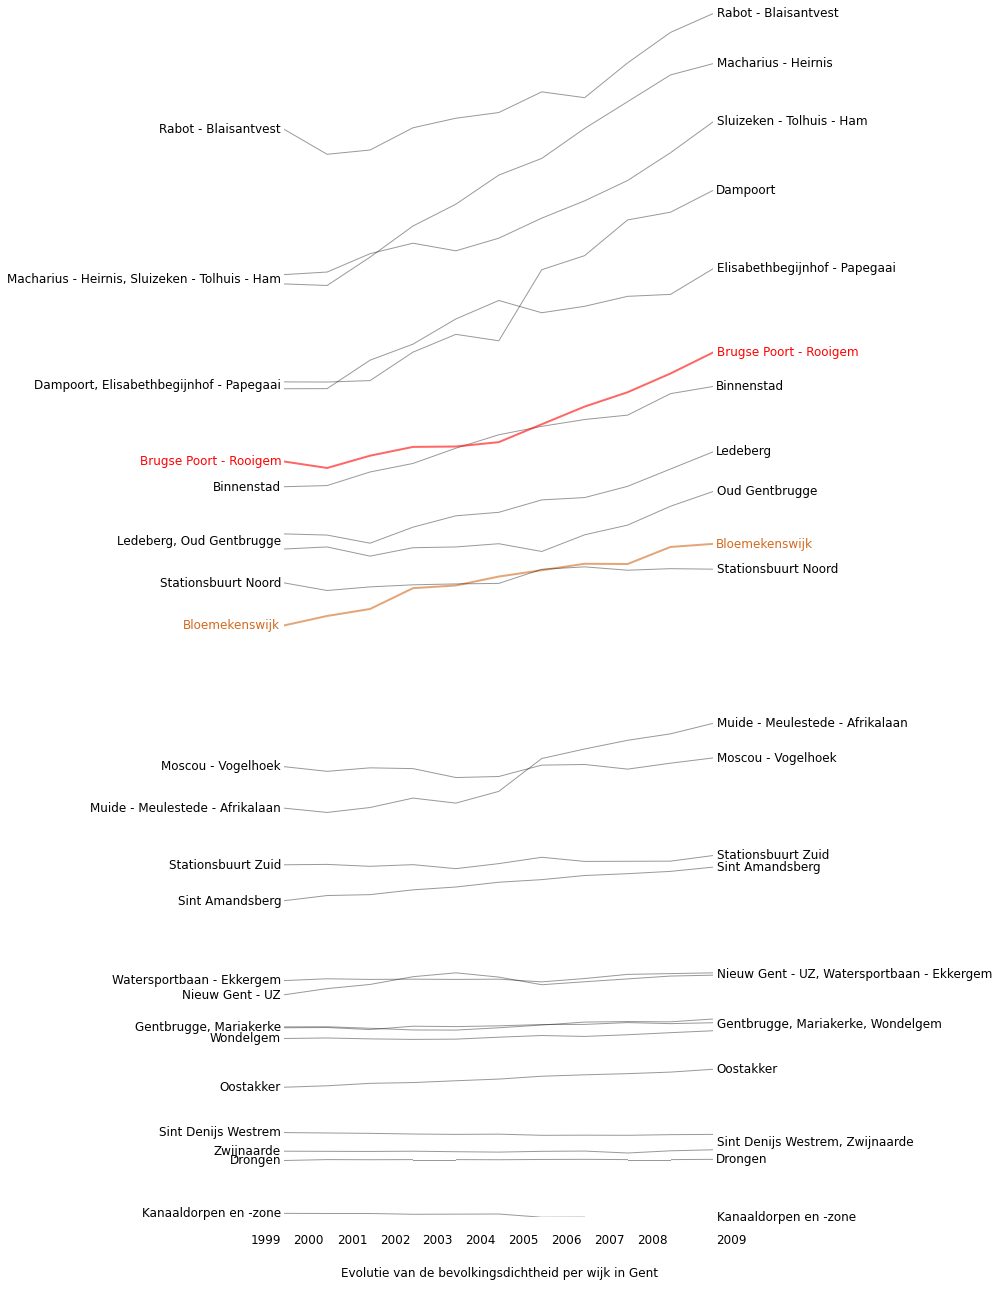

In [8]:
f=slope(dichtheid.iloc[:,:-1], kind='interval', marker=None, color=color, 
        title='Evolutie van de bevolkingsdichtheid per wijk in Gent',
        font_size=12, width=14, height=18, wspace=None, 
        savename='dichtheid_gent.png', dpi=150)

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 30 22:32:04 2013

@author: pascal Schetelat
"""

import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib.font_manager import FontProperties, findSystemFonts
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import os
import matplotlib.gridspec as gridspec


def slope(data,
          kind='interval',
          marker='%0.f',
          color=None,
          title='',
          font_family='GillSans',
          font_size=12,
          width=12,
          height=8,
          ax=None,
          savename=None,
          dpi=150,
          wspace=None, ):
    """====
Slope
====

Definition: slope(data,kind=['interval','ordinal'],height,width,font_size,savename,color,title)

----

Plot Slope plot Tufte Style
:class:`matplotlib.figure.Figure object`. 

Parameters
----------
data : pandas dataFrame
    index indicate the categories
    columns indicate time / period

    
marker style : str, format
            Format to present the data
            default '%0.f'

label_position : str ['ordinal', 'interval']
            how to position labels.
            Interval will place them according to their values
            Ordinal will place them according to their rank

font_family     : font family name installed on your system
            
font_size : set the font size
            in case your data have more lines than you can have text lines of text
            in your figure height, data will be binned to fit 
            (default 12)

height    :   Figure height in inches (default 12)

with      :   Figure width in inches (default 8)

savename     :  file path to save your graph

color     : a dictionary {label:color} 
 
title      : a title at the bottom of the graph

Examples
--------

>>> data = pd.read_csv(os.path.join('Data','EU_GDP_2007_2013.csv'),index_col=0,na_values='-')
>>> f = slope(data/1000,kind='interval',height= 12,width=20,font_size=12,savename='EU_interval.png',title = u'title')  

    
    """
    font = FontProperties(font_family)
    font.set_size(font_size)
    bx = None

    df = data.copy()

    cols = df.columns
    df['__label__'] = df.index
    df['__order__'] = range(len(df.index))

    if kind == 'stack':
        f, axarr = plt.subplots(len(df), len(cols) - 1,
                                facecolor="w",
                                squeeze=False,
                                sharex=True)  #,sharey=True)
    else:
        #f, axarr = plt.subplots(2,len(cols)-1,facecolor="w",squeeze=True,figsize=(width,height),dpi=30)#,sharex=True)#,sharey=True)
        f = plt.figure(figsize=(width, height), dpi=30, facecolor="w")
        gs = gridspec.GridSpec(
            nrows=20,
            ncols=len(cols) - 1
        )  # the 20 rows are just there to provide enought space for the title
        axarr = []
        axarr_X = []

        for i in range(len(cols) - 1):
            axarr.append(plt.subplot(gs[:19, i]))
            axarr_X.append(plt.subplot(gs[19, i]))

    axarr = np.array(axarr)
    axarr_X = np.array(axarr_X)
    renderer = f.canvas.get_renderer()
    data_range = [data.min().min(), data.max().max()]
    fh = f.get_figheight()
    fw = f.get_figwidth()
    fdpi = f.get_dpi()

    nt = fh // (font.get_size() / 72) / 2
    res = np.diff(data_range)[0] / nt * 2

    if not hasattr(axarr, 'transpose'):
        axarr = [axarr]

    for i in range((len(cols) - 1)):
        ax = axarr[i]

        axarr_X[i].yaxis.set_tick_params(width=0)
        axarr_X[i].xaxis.set_tick_params(width=0)
        """
        from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker
        # orange label
        obox1 = TextArea("orange - ", textprops=dict(color="k", size=15))
        obox2 = TextArea("5 ", textprops=dict(color="b", size=15))
        obox3 = TextArea(": ", textprops=dict(color="k", size=15))
        obox4 = TextArea("10 ", textprops=dict(color="r", size=15))
        
        orangebox = HPacker(children=[obox1, obox2, obox3, obox4],
                            align="center", pad=0, sep=5)
                    """

        if kind == 'interval':
            labelsL = df.groupby(pd.cut(df[cols[i]], nt))['__label__'].agg(
                ', '.join).dropna()
            labelsR = df.groupby(pd.cut(df[cols[i + 1]], nt))['__label__'].agg(
                ', '.join).dropna()

            yPos_L = df.groupby(pd.cut(df[cols[i]],
                                       nt))[cols[i]].mean().dropna()
            yPos_R = df.groupby(pd.cut(df[cols[i + 1]],
                                       nt))[cols[i + 1]].mean().dropna()

            yMark_L = df.groupby(pd.cut(df[cols[i]],
                                        nt))[cols[i]].mean().dropna()
            yMark_R = df.groupby(pd.cut(df[cols[i + 1]],
                                        nt))[cols[i + 1]].mean().dropna()

            yPos_ = df[[cols[i], cols[i + 1]]]

        if kind == 'ordinal':

            yPos_L = df[[cols[i]]].rank(ascending=False).applymap(
                lambda el: round(el + 0.1))
            yPos_R = df[[cols[i + 1]]].rank(ascending=False).applymap(
                lambda el: round(el + 0.1))
            yMark_L = df.groupby(cols[i])[cols[i]].mean().dropna()
            yMark_R = df.groupby(cols[i + 1])[cols[i + 1]].mean().dropna()
            yMark_L.sort(ascending=False)
            yMark_R.sort(ascending=False)
            #print yMark_L

            labelsL = df.groupby(yPos_L[cols[i]].values)['__label__'].agg(
                ', '.join)
            labelsR = df.groupby(yPos_R[cols[i + 1]].values)['__label__'].agg(
                ', '.join)
            yPos_L.sort(cols[i], inplace=True)
            yPos_R.sort(cols[i + 1], inplace=True)

            yPos_ = yPos_L.join(yPos_R)  #.sort(cols[i],inplace=True)
#        if i == 1: 
#            #print yPos_.T
#            print labelsL
#            #yPos_   =  df[[cols[i],cols[i+1]]]
#

#        if kind=='stack' : 
#            
#            yPos_L = df[cols[i]].rank()
#            yPos_R = df[cols[i+1]].rank()
#            
#            labelsL = df.groupby(yPos_L)['__label__'].agg(', '.join) 
#            labelsR = df.groupby(yPos_R)['__label__'].agg(', '.join) 
#            
#            yPos_ = yPos_L.join(yPos_R)            
#            
#            yPos_L  =  labelsL.index.values
#            yPos_R  =  labelsR.index.values

        if kind == "stack":
            ax.plot([0, 1], [0, 1], color='k', alpha=0.4)
        else:
            #print yPos_
            lines = ax.plot(yPos_.T, color='k', alpha=0.4)
            ax.spines['bottom'].set_visible(False)
            ax.xaxis.set_ticks_position('bottom')

            if kind == "ordinal":
                ax.set_ybound(lower=1, upper=len(yPos_))
            if kind == "interval":
                ax.set_ybound(lower=data.min().min(), upper=data.max().max())

                #ax.set_xbound(lower=0,upper=1)

            ax.set_xticklabels([])
            #print cols[i]
            axarr_X[i].set_yticks([1])
            axarr_X[i].set_xticklabels([])
            axarr_X[i].set_yticklabels([str(cols[i])], fontproperties=font)
            #ax.set_xticklabels([str(cols[i])],horizontalalignment='center',fontproperties=font)
            #            ax.spines['top'].set_visible(False)
            #            ax.spines['right'].set_visible(False)
            #            ax.spines['left'].set_visible(False)

            if marker:
                labelsL_str = [item[1] + (marker % item[0]).rjust(6)
                               for item in zip(yMark_L.values, labelsL.values)]
                labelsR_str = [(marker % item[0]).ljust(6) + item[1]
                               for item in zip(yMark_R.values, labelsR.values)]
                ylabelsL_str = map(lambda el: marker % el, yMark_L.values)
                ylabelsR_str = map(lambda el: marker % el, yMark_R.values)
            else:
                labelsL_str = labelsL.values
                labelsR_str = labelsR.values
                ylabelsL_str = map(lambda el: u'', yPos_L.values)
                ylabelsR_str = map(lambda el: u'', yPos_R.values)

            if i == 0:
                ax.set_yticks(yPos_L.values)
                ax.set_yticklabels(labelsL_str, fontproperties=font)
            elif marker:
                ax.set_yticks(yPos_L.values)
                ax.set_yticklabels(ylabelsL_str,
                                   fontproperties=font,
                                   ha='right'
                                   )  #ha='center')#,backgroundcolor='w')
            else:
                plt.setp(ax.get_yticklabels(), visible=False)
                wspace = 0

            if i == len(cols) - 2:
                bx = ax.twinx()

                bx.set_ybound(ax.get_ybound())
                bx.set_yticks(yPos_R.values)
                bx.set_yticklabels(labelsR_str, fontproperties=font)
                bx.yaxis.set_tick_params(width=0)

                bx_X = axarr_X[i].twinx()
                bx_X.set_xticklabels([])
                bx_X.set_yticks([1])
                bx_X.yaxis.set_tick_params(width=0)
                bx_X.set_yticklabels([str(cols[i + 1])], fontproperties=font)

            if kind == 'ordinal':
                ax.invert_yaxis()
                if bx:
                    bx.invert_yaxis()

            if color:

                for tl in ax.yaxis.get_ticklabels():
                    try:
                        for kw, c in color.items():

                            if kw in tl.get_text():
                                tl.set_color(c)

                    except:
                        print('fail')
                        pass
                if bx:
                    for tl in bx.yaxis.get_ticklabels():
                        try:
                            for kw, c in color.items():

                                if kw in tl.get_text():
                                    tl.set_color(c)
                        except:
                            pass

            if color:
                for kw, c in color.items():
                    for j, lab__ in enumerate(yPos_.index):
                        if kw in lab__:
                            lines[j].set_color(c)
                            lines[j].set_linewidth(2)
                            lines[j].set_alpha(0.6)

                            for kk, tic_pos in enumerate(
                                ax.yaxis.get_ticklocs()):

                                if yPos_.values[j][0] == tic_pos:

                                    ax.yaxis.get_ticklabels()[kk].set_color(c)

            ax.yaxis.set_tick_params(width=0)
            ax.xaxis.set_tick_params(width=0)

            ax.xaxis.grid(False)

    f.suptitle(title, x=0.5, y=0.02, fontproperties=font)
    plt.tight_layout()

    for ax in f.axes:
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

    tw = ax.yaxis.get_text_widths(renderer)[0]
    #dpi = f.properties()['dpi']
    if wspace == 0:
        pass
    else:
        #wspace = tw/dpi
        aw = ax.get_tightbbox(renderer).width
        wspace = tw / aw * 1.4

    #f.subplots_adjust(wspace=wspace)
    f.subplots_adjust(wspace=wspace)

    if kind == "stack":
        f.subplots_adjust(wspace=wspace, hspace=0)
    else:
        pass

    if savename:
        f.savefig(savename, dpi=dpi)
        #os.system("start " + savename)

    return f